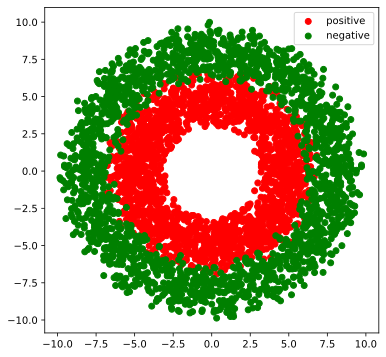

In [2]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers,losses,metrics,optimizers
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

#正负样本数量
n_positive,n_negative = 2000,2000

#生成正样本, 小圆环分布
r_p = 5.0 + tf.random.truncated_normal([n_positive,1],0.0,1.0)
theta_p = tf.random.uniform([n_positive,1],0.0,2*np.pi) 
Xp = tf.concat([r_p*tf.cos(theta_p),r_p*tf.sin(theta_p)],axis = 1)
Yp = tf.ones_like(r_p)

#生成负样本, 大圆环分布
r_n = 8.0 + tf.random.truncated_normal([n_negative,1],0.0,1.0)
theta_n = tf.random.uniform([n_negative,1],0.0,2*np.pi) 
Xn = tf.concat([r_n*tf.cos(theta_n),r_n*tf.sin(theta_n)],axis = 1)
Yn = tf.zeros_like(r_n)

#汇总样本
X = tf.concat([Xp,Xn],axis = 0)
Y = tf.concat([Yp,Yn],axis = 0)


#可视化
plt.figure(figsize = (6,6))
plt.scatter(Xp[:,0].numpy(),Xp[:,1].numpy(),c = "r")
plt.scatter(Xn[:,0].numpy(),Xn[:,1].numpy(),c = "g")
plt.legend(["positive","negative"]);

In [3]:
#构建输入数据管道
ds = tf.data.Dataset.from_tensor_slices((X,Y)) \
     .shuffle(buffer_size = 4000).batch(100) \
     .prefetch(tf.data.experimental.AUTOTUNE) 

In [4]:
class DNNModel(tf.Module):
    def __init__(self,name = None):
        super(DNNModel, self).__init__(name=name)
        self.dense1 = layers.Dense(4) 
        self.A1 = layers.Activation('relu')
        self.dense2 = layers.Dense(8,activation = "relu")
        self.dense3 = layers.Dense(1,activation = "sigmoid")

     
    # 正向传播
    @tf.function(input_signature=[tf.TensorSpec(shape = [None,2], dtype = tf.float32)])  
    def __call__(self,x):
        x = self.dense1(x)
        x = self.A1(x)
        x = self.dense2(x)
        y = self.dense3(x)
        return y
    
model = DNNModel()
model.loss_func = losses.binary_crossentropy
model.metric_func = metrics.binary_accuracy
model.optimizer = optimizers.Adam(learning_rate=0.001)

In [5]:
(features,labels) = next(ds.as_numpy_iterator())

predictions = model(features)

loss = model.loss_func(tf.reshape(labels,[-1]),tf.reshape(predictions,[-1]))
metric = model.metric_func(tf.reshape(labels,[-1]),tf.reshape(predictions,[-1]))
tf.print(predictions)
tf.print("init loss:",loss)
tf.print("init metric",metric)

[[0.576558]
 [0.541511238]
 [0.614205718]
 ...
 [0.603491783]
 [0.614668548]
 [0.583575726]]
init loss: 0.799533069
init metric 0.44


In [8]:
with tf.GradientTape() as tape:
    pred=model(features)
    loss=model.loss_func(tf.reshape(labels,[-1]),tf.reshape(pred,[-1]))
grads=tape.gradient(loss, model.trainable_variables)
print(model.trainable_variables[0])
  

<tf.Variable 'dense/kernel:0' shape=(2, 4) dtype=float32, numpy=
array([[ 0.14600018, -0.46616644, -0.93181217,  0.8114421 ],
       [ 0.15250924,  0.19877097, -0.39331117,  0.18548654]],
      dtype=float32)>


In [21]:
model.optimizer.apply_gradients(zip(grads,model.trainable_variables))
print(model.trainable_variables[0])

<tf.Variable 'dense/kernel:0' shape=(2, 4) dtype=float32, numpy=
array([[ 0.14300628, -0.4631694 , -0.934809  ,  0.8084479 ],
       [ 0.14951144,  0.19577342, -0.3903087 ,  0.18248741]],
      dtype=float32)>


In [20]:
gv=zip(grads,model.trainable_variables)  

In [22]:
model.optimizer.apply_gradients(gv)

<tf.Variable 'UnreadVariable' shape=() dtype=int64, numpy=5>

In [23]:
print(model.trainable_variables[0])

<tf.Variable 'dense/kernel:0' shape=(2, 4) dtype=float32, numpy=
array([[ 0.14200859, -0.46217057, -0.9358078 ,  0.8074501 ],
       [ 0.14851229,  0.19477437, -0.3893076 ,  0.18148774]],
      dtype=float32)>


In [10]:
import tensorflow as tf

In [11]:
W1 = tf.Variable(1.0)
print(id(W1),W1)

4408828352 <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1.0>


In [12]:
W1.assign_add(-1.0)

<tf.Variable 'UnreadVariable' shape=() dtype=float32, numpy=0.0>

In [13]:
print(id(W1),W1)

4408828352 <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.0>
